In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

In [2]:
# Definim tab20 com la paleta per defecte dels plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)

In [3]:
# Llegim les dades
dataarray = xr.open_dataset('stats.nc', engine='scipy')
dataarray

<xarray.Dataset> Size: 91kB
Dimensions:                (matchday: 36, player: 17)
Coordinates:
  * matchday               (matchday) int32 144B 0 1 2 3 4 5 ... 31 32 33 34 35
  * player                 (player) object 136B 'Alejandro' 'Antía' ... 'Víctor'
Data variables: (12/20)
    GamesPlayed            (matchday, player) int32 2kB ...
    PlayedAttack           (matchday, player) int32 2kB ...
    PlayedDefense          (matchday, player) int32 2kB ...
    WinPlayed              (matchday, player) float64 5kB ...
    WinPlayedAttack        (matchday, player) float64 5kB ...
    WinPlayedDefense       (matchday, player) float64 5kB ...
    ...                     ...
    ReceivedAttack         (matchday, player) float64 5kB ...
    ReceivedDefense        (matchday, player) float64 5kB ...
    ReceivedAttackPlayed   (matchday, player) float64 5kB ...
    ReceivedDefensePlayed  (matchday, player) float64 5kB ...
    AttackIndex            (matchday, player) float64 5kB ...
    DefenseIndex           (matchday, player) float64 5kB ...

In [4]:
# Extreiem els noms dels jugadors i les jornades
players_names = dataarray['player'].astype(str).values # noms dels jugadors
players_names.shape

(17,)

In [5]:
# Extreiem els valors de victòries / jugats de l'última jornada
winplayed_values = dataarray['ReceivedDefense'].sel(player = 'Pau').isel(matchday = -1).values


In [6]:
stats = ['WinPlayedAttack', 'WinPlayedDefense', 'ScoredAttackPlayed', 'ScoredDefensePlayed', 'ReceivedAttackPlayed', 'ReceivedDefensePlayed']
players = ['Dani', 'Luis', 'Antía', 'Rebeca', 'Pedro', 'Pau']

In [34]:
normalizing_values = dataarray[stats].sel(player=players).isel(matchday = -1).max().as_numpy() # valors màxims per normalitzar el plot a 1
print(normalizing_values['WinPlayedAttack'])

<xarray.DataArray 'WinPlayedAttack' ()> Size: 8B
array(0.65555556)
Coordinates:
    matchday  int32 4B 35


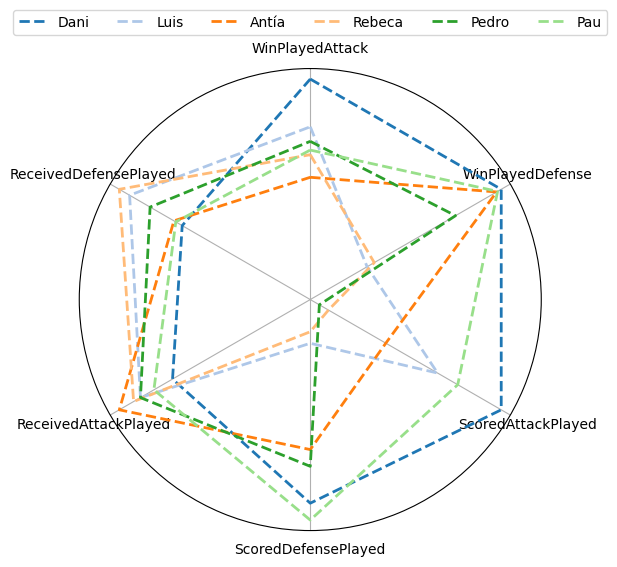

In [44]:
### values = [4, 3, 2, 5, 4]

# Number of variables
num_vars = len(stats)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end.
angles += angles[:1]

# Create the figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], stats)

# Draw ylabels
#ax.set_rscale('log')
plt.yticks([], labels=[])
#plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
#plt.ylim(0, 5)

# Plot data
for player in players:
    values = [dataarray[stats[i]].sel(player=player).isel(matchday=-1) / normalizing_values[stats[i]] for i in range(num_vars)] # values for each stats for this player
    values += values[:1] # "complete the loop"

    # Normalitzem
#    values = values / normalizing_values

    # Pintem
    ax.plot(angles, values, linestyle='dashed', linewidth = 2, label = player)

    # Fill area
    #ax.fill(angles, values, 'b', alpha=0.1)

plt.legend(ncol = 6, bbox_to_anchor=(0.5, 1.1), loc = 'center')
plt.savefig('results/radial_stats.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# dataarray.close()